<a href="https://colab.research.google.com/github/rnstr/DatatScience/blob/main/homework_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
myDirFiles = "/content/drive/MyDrive/Colab Notebooks/digital skola/pandas"
os.chdir(myDirFiles)

In [3]:
!ls

'14 - Data Telco Exploration Question.ipynb'   ds_pandas.ipynb
 cereal.csv				       homework_dataframe.ipynb
 cereal_imp.csv				      'Homework - DataFrame.xlsx'
 cereal_new.csv				       intermediate_dataframe
 Churn_customer.xlsx			       intermediateDataFrame.ipynb
 Conditional_and_more.ipynb		       nomenklatur.png
 DataFrameI				       Pandas_Intro.ipynb
'DataFrame I'				       Telco_Churn.csv
'Dataframe II.ipynb'			       Untitled0.ipynb


# import library

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data 

In [204]:
# read excel data on Paid-Transaction sheet, 
dfPaidTrx = pd.read_excel('Homework - DataFrame.xlsx', header = 1, usecols = "B:L", index_col = None,  sheet_name= 'Paid-Transaction' )
dfPaidTrx.head(1)

,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724.0,2.017072e+14,elvride,aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,153000.0,10200.0,9000.0,0.0


In [205]:
# read excel data on Transaction Fee sheet, 
dfTrxFee = pd.read_excel('Homework - DataFrame.xlsx', header = 4, usecols = "B:D", index_col = None, sheet_name = "Transaction Fee")
dfTrxFee.head(3)

#check unique
dfTrxFee['Meta Category'].unique()

array(['Home/ Food', 'Gadget/ Komputer', 'Fashion', 'Babies/ Kids',
       'Beauty/ Health', 'Sports/ Hobi/ Otomotif', 'Elektronik',
       'Service/ Mokado', 'Home/ Food ', 'Gadget/ Komputer ', 'Fashion ',
       'Babies/ Kids ', 'Beauty/ Health ', 'Sports/ Hobi/ Otomotif ',
       'Elektronik ', 'Service/ Mokado '], dtype=object)

In [206]:
dfTrxFee['Meta Category'] = dfTrxFee['Meta Category'].str.strip()

## Question 1 In Paid-Transaction sheet, Insert column after Last Name, name the new column as Full Name.

In [207]:
dfPaidTrx.insert(4, 'Full Name', dfPaidTrx['First Name'] + ' . ' + dfPaidTrx['Last Name'])
dfPaidTrx

,Paid Date,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724.0,2.017072e+14,elvride,aries,elvride . aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,153000.0,10200.0,9000.0,0.0
1,20170701.0,2.017070e+14,BASIR,Ninuk,BASIR . Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800.0,68000.0,0.0,0.0,0.0
2,20170707.0,2.017071e+14,Citra,Ardi,Citra . Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000.0,0.0,700.0,0.0,0.0
3,20170720.0,2.017072e+14,Dian,Renaldi,Dian . Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000.0,0.0,5900.0,0.0,0.0
4,20170722.0,2.017072e+14,rizal,Tamba,rizal . Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000.0,0.0,5600.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20171201.0,2.017120e+14,Fitrah,gina,Fitrah . gina,Service/ Mokado,"Xtra Combo 12GB, 30hr",333000.0,300000.0,2300.0,0.0,0.0
11996,20171203.0,2.017120e+14,Djebeng,Shinta,Djebeng . Shinta,Service/ Mokado,"Xtra Combo 12GB, 30hr",280000.0,222500.0,0.0,0.0,0.0
11997,20171204.0,2.017120e+14,Amik,Elan,Amik . Elan,Home/ Food,Kreta - Kripik Tempe Indonesia - Rasa Jomblo d...,150000.0,81000.0,4800.0,0.0,0.0
11998,20171207.0,2.017121e+14,Anna,asih,Anna . asih,Gadget/ Komputer,Samsung Galaxy J5 Pro Garansi Resmi Special Price,475000.0,400000.0,0.0,0.0,0.0


## Question 2 In Paid-Transaction sheet, insert two columns next to Paid Date. Name the first one as Paid Date 2 and the second as Paid Day.



In [208]:
dfPaidTrx.insert(1, 'Paid Date 2', pd.to_datetime(dfPaidTrx['Paid Date'], format='%Y%m%d' ).dt.strftime('%d-%b-%y'))
dfPaidTrx.insert(2, 'Paid Day', pd.to_datetime(dfPaidTrx['Paid Date'], format='%Y%m%d' ).dt.strftime('%a'))
dfPaidTrx

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724.0,24-Jul-17,Mon,2.017072e+14,elvride,aries,elvride . aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,153000.0,10200.0,9000.0,0.0
1,20170701.0,01-Jul-17,Sat,2.017070e+14,BASIR,Ninuk,BASIR . Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800.0,68000.0,0.0,0.0,0.0
2,20170707.0,07-Jul-17,Fri,2.017071e+14,Citra,Ardi,Citra . Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000.0,0.0,700.0,0.0,0.0
3,20170720.0,20-Jul-17,Thu,2.017072e+14,Dian,Renaldi,Dian . Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000.0,0.0,5900.0,0.0,0.0
4,20170722.0,22-Jul-17,Sat,2.017072e+14,rizal,Tamba,rizal . Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000.0,0.0,5600.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20171201.0,01-Dec-17,Fri,2.017120e+14,Fitrah,gina,Fitrah . gina,Service/ Mokado,"Xtra Combo 12GB, 30hr",333000.0,300000.0,2300.0,0.0,0.0
11996,20171203.0,03-Dec-17,Sun,2.017120e+14,Djebeng,Shinta,Djebeng . Shinta,Service/ Mokado,"Xtra Combo 12GB, 30hr",280000.0,222500.0,0.0,0.0,0.0
11997,20171204.0,04-Dec-17,Mon,2.017120e+14,Amik,Elan,Amik . Elan,Home/ Food,Kreta - Kripik Tempe Indonesia - Rasa Jomblo d...,150000.0,81000.0,4800.0,0.0,0.0
11998,20171207.0,07-Dec-17,Thu,2.017121e+14,Anna,asih,Anna . asih,Gadget/ Komputer,Samsung Galaxy J5 Pro Garansi Resmi Special Price,475000.0,400000.0,0.0,0.0,0.0


## Question 3 In Paid-Transaction sheet, Insert column after Seller Discount, name the new column as GMV

In [209]:
dfPaidTrx.insert(11, 'GMV', dfPaidTrx['Transaction Amount'] - dfPaidTrx['Seller Discount'] + dfPaidTrx['Delivery Fee'])
dfPaidTrx

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount
0,20170724.0,24-Jul-17,Mon,2.017072e+14,elvride,aries,elvride . aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,153000.0,156000.0,10200.0,9000.0,0.0
1,20170701.0,01-Jul-17,Sat,2.017070e+14,BASIR,Ninuk,BASIR . Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800.0,68000.0,219800.0,0.0,0.0,0.0
2,20170707.0,07-Jul-17,Fri,2.017071e+14,Citra,Ardi,Citra . Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000.0,0.0,35000.0,700.0,0.0,0.0
3,20170720.0,20-Jul-17,Thu,2.017072e+14,Dian,Renaldi,Dian . Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000.0,0.0,85000.0,5900.0,0.0,0.0
4,20170722.0,22-Jul-17,Sat,2.017072e+14,rizal,Tamba,rizal . Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000.0,0.0,81000.0,5600.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20171201.0,01-Dec-17,Fri,2.017120e+14,Fitrah,gina,Fitrah . gina,Service/ Mokado,"Xtra Combo 12GB, 30hr",333000.0,300000.0,33000.0,2300.0,0.0,0.0
11996,20171203.0,03-Dec-17,Sun,2.017120e+14,Djebeng,Shinta,Djebeng . Shinta,Service/ Mokado,"Xtra Combo 12GB, 30hr",280000.0,222500.0,57500.0,0.0,0.0,0.0
11997,20171204.0,04-Dec-17,Mon,2.017120e+14,Amik,Elan,Amik . Elan,Home/ Food,Kreta - Kripik Tempe Indonesia - Rasa Jomblo d...,150000.0,81000.0,69000.0,4800.0,0.0,0.0
11998,20171207.0,07-Dec-17,Thu,2.017121e+14,Anna,asih,Anna . asih,Gadget/ Komputer,Samsung Galaxy J5 Pro Garansi Resmi Special Price,475000.0,400000.0,75000.0,0.0,0.0,0.0


## Question 4 in Paid-Transaction sheet, insert column 'Net Revenue'

`Net Revenue = Transaction Fee Amount - Sales Discount - Other Discount`

In [210]:
# merge column and drop unused column
dfPaidTrx['Month'] = pd.to_datetime(dfPaidTrx['Paid Date 2'], format='%d-%b-%y').dt.strftime('%m')
dfTrxFee['Month'] = pd.to_datetime(dfTrxFee['Month'], format='%Y%m').dt.strftime('%m')
dfPaidTrx = dfPaidTrx.merge(dfTrxFee, on =  ['Month','Meta Category'], how = 'left')
#dfPaidTrx.drop('Month', axis = 1, inplace = True)

# add column Net Revenue
dfPaidTrx['Net Revenue'] = (dfPaidTrx['Transaction Amount'] * dfPaidTrx['Transaction Fee Rate']) - dfPaidTrx['Sales Discount'] - dfPaidTrx['Other Discount']
dfPaidTrx

,Paid Date,Paid Date 2,Paid Day,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue
0,20170724.0,24-Jul-17,Mon,2.017072e+14,elvride,aries,elvride . aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000.0,153000.0,156000.0,10200.0,9000.0,0.0,07,0.034,0.0
1,20170701.0,01-Jul-17,Sat,2.017070e+14,BASIR,Ninuk,BASIR . Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800.0,68000.0,219800.0,0.0,0.0,0.0,07,0.010,2878.0
2,20170707.0,07-Jul-17,Fri,2.017071e+14,Citra,Ardi,Citra . Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000.0,0.0,35000.0,700.0,0.0,0.0,07,0.010,-350.0
3,20170720.0,20-Jul-17,Thu,2.017072e+14,Dian,Renaldi,Dian . Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000.0,0.0,85000.0,5900.0,0.0,0.0,07,0.090,1750.0
4,20170722.0,22-Jul-17,Sat,2.017072e+14,rizal,Tamba,rizal . Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000.0,0.0,81000.0,5600.0,0.0,0.0,07,0.030,-3170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20171201.0,01-Dec-17,Fri,2.017120e+14,Fitrah,gina,Fitrah . gina,Service/ Mokado,"Xtra Combo 12GB, 30hr",333000.0,300000.0,33000.0,2300.0,0.0,0.0,12,0.009,697.0
11996,20171203.0,03-Dec-17,Sun,2.017120e+14,Djebeng,Shinta,Djebeng . Shinta,Service/ Mokado,"Xtra Combo 12GB, 30hr",280000.0,222500.0,57500.0,0.0,0.0,0.0,12,0.009,2520.0
11997,20171204.0,04-Dec-17,Mon,2.017120e+14,Amik,Elan,Amik . Elan,Home/ Food,Kreta - Kripik Tempe Indonesia - Rasa Jomblo d...,150000.0,81000.0,69000.0,4800.0,0.0,0.0,12,0.067,5250.0
11998,20171207.0,07-Dec-17,Thu,2.017121e+14,Anna,asih,Anna . asih,Gadget/ Komputer,Samsung Galaxy J5 Pro Garansi Resmi Special Price,475000.0,400000.0,75000.0,0.0,0.0,0.0,12,0.032,15200.0


## Question 5 


*   On primary axis, show monthly GMV figures using bar chart.
*   On secondary axis, plot monthly %Net Revenue as line chart.

```
%Net Revenue = Net Revenue / GMV
```

In [211]:
dfPaidTrx['% Net Revenue'] = dfPaidTrx['Net Revenue']  / dfPaidTrx['GMV']

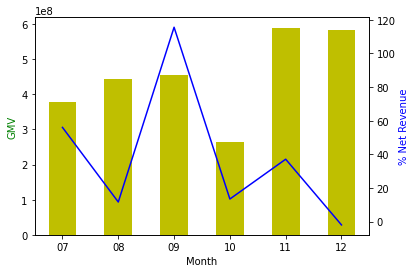

In [251]:
fig, ax1 = plt.subplots()

ax1 = dfPaidTrx.groupby('Month')['GMV'].sum().plot(kind= 'bar', ylabel ='GMV', color = 'y')
ax2 = dfPaidTrx.groupby('Month')['% Net Revenue'].sum().plot(secondary_y=True, kind= 'line', color = 'b' )

ax1.set_xlabel('Month')
ax1.set_ylabel('GMV', color='g')
ax2.set_ylabel('% Net Revenue', color='b')

plt.show()

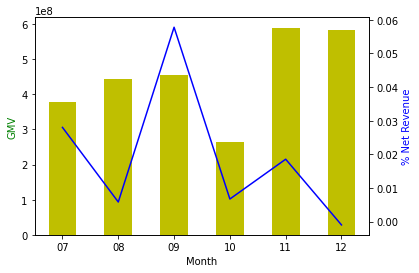

In [218]:
plt.show()